# In this file we are performing data preprocessing and trying to understand the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv('Dataset/accident_dataset.csv')
data

,Country,State,Year,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons
0,India,Jharkhand,"Financial Year (Apr - Mar), 2021",Dhanbad,Others,0,0.0,0.0,0.0
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Bicycles,38,16.0,8.0,19.0
2,India,Gujarat,"Financial Year (Apr - Mar), 2020",Vadodra,Bicycles,19,5.0,10.0,5.0
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vizag,Auto Rickshaws,74,10.0,46.0,46.0
4,India,Bihar,"Financial Year (Apr - Mar), 2020",Patna,Pedestrian,80,52.0,68.0,3.0
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0
1346,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Kota,Auto Rickshaws,7,2.0,4.0,7.0
1347,India,Rajasthan,"Financial Year (Apr - Mar), 2019",Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0
1348,India,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0


## STEP 1:-  In first step we will try to find missing values and deal with that

In [3]:
# Find and count NaN values in each column
nan_counts = data.isna().sum()
# Display the count of NaN values in each column
print(nan_counts)

Country                                        0
State                                          0
Year                                           0
City name                                      0
Type of impacting vehicles or objects          0
Number of road accidents                       0
Number of persons killed in road accidents     1
Number of grievously injured persons           1
Number of minor injured persons                1
dtype: int64


<font color = "Green">We have 3 nan so now i will try to find exact rows where these values are missing</font>

In [4]:
nan_rows = data[data.isna().any(axis=1)]
nan_rows

,Country,State,Year,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons
855,India,Madhya Pradesh,"Financial Year (Apr - Mar), 2020",Gwalior,Other Non-motorized vehicle (E-rickshaw etc.),0,NaN,NaN,NaN


In [5]:
count = (data['State'] == "Madhya Pradesh").sum()
print("Number of entries with 'Madhya Pradesh':", count)

Number of entries with 'Madhya Pradesh': 108


<font color ="Green">We have all nan present in one row only and that row corresponds to data of MP and MP has 108 enteries so we can safely drop this row </font>

In [6]:
data = data.dropna()
data

,Country,State,Year,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons
0,India,Jharkhand,"Financial Year (Apr - Mar), 2021",Dhanbad,Others,0,0.0,0.0,0.0
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Bicycles,38,16.0,8.0,19.0
2,India,Gujarat,"Financial Year (Apr - Mar), 2020",Vadodra,Bicycles,19,5.0,10.0,5.0
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vizag,Auto Rickshaws,74,10.0,46.0,46.0
4,India,Bihar,"Financial Year (Apr - Mar), 2020",Patna,Pedestrian,80,52.0,68.0,3.0
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0
1346,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Kota,Auto Rickshaws,7,2.0,4.0,7.0
1347,India,Rajasthan,"Financial Year (Apr - Mar), 2019",Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0
1348,India,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0


In [7]:
# Find and count NaN values in each column
nan_counts = data.isna().sum()
# Display the count of NaN values in each column
print(nan_counts)

Country                                        0
State                                          0
Year                                           0
City name                                      0
Type of impacting vehicles or objects          0
Number of road accidents                       0
Number of persons killed in road accidents     0
Number of grievously injured persons           0
Number of minor injured persons                0
dtype: int64


<font color = "Green">Now we dont have any nan in our data</font>

## STEP 2 :-Checking whether Dataset is balanced or not 

### a) Statewise Distribution

In [8]:
unique_value_counts = data.nunique()
# Display the number of unique values in each column
print(unique_value_counts)

Country                                          1
State                                           19
Year                                             3
City name                                       50
Type of impacting vehicles or objects            9
Number of road accidents                       401
Number of persons killed in road accidents     192
Number of grievously injured persons           244
Number of minor injured persons                271
dtype: int64


In [9]:
# Extract unique values from a specific column
unique_values = data['State'].unique()
# Convert the unique values to a Python list (array)
unique_values_list = list(unique_values)
unique_values_list

['Jharkhand',
 'Andhra Pradesh',
 'Gujarat',
 'Bihar',
 'Chhattisgarh',
 'Kerala',
 'Delhi',
 'Haryana',
 'Karnataka',
 'Chandigarh',
 'Jammu And Kashmir',
 'Uttar Pradesh',
 'Punjab',
 'Telangana',
 'Madhya Pradesh',
 'West Bengal',
 'Rajasthan',
 'Maharashtra',
 'Tamil Nadu']

In [10]:
state_counts = data['State'].value_counts()
print(state_counts)

Uttar Pradesh        189
Kerala               189
Maharashtra          135
Tamil Nadu           108
Gujarat              108
Madhya Pradesh       107
Rajasthan             81
West Bengal           54
Punjab                54
Jharkhand             54
Andhra Pradesh        54
Jammu And Kashmir     27
Karnataka             27
Telangana             27
Haryana               27
Delhi                 27
Chhattisgarh          27
Bihar                 27
Chandigarh            27
Name: State, dtype: int64


In [11]:
# Calculate the percentage by dividing each count by the total count and multiplying by 100
state_percentages = (state_counts / len(data['State'])) * 100

print(state_percentages)

Uttar Pradesh        14.010378
Kerala               14.010378
Maharashtra          10.007413
Tamil Nadu            8.005930
Gujarat               8.005930
Madhya Pradesh        7.931801
Rajasthan             6.004448
West Bengal           4.002965
Punjab                4.002965
Jharkhand             4.002965
Andhra Pradesh        4.002965
Jammu And Kashmir     2.001483
Karnataka             2.001483
Telangana             2.001483
Haryana               2.001483
Delhi                 2.001483
Chhattisgarh          2.001483
Bihar                 2.001483
Chandigarh            2.001483
Name: State, dtype: float64


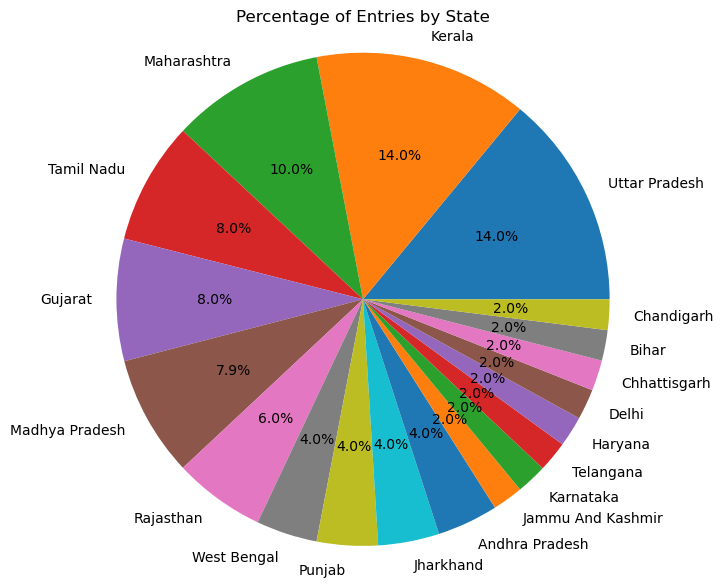

In [12]:
#Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(state_percentages, labels=state_percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Entries by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<font color = "Green">we have 8 states with 2 percent of total data and highest is 14 percent coming from UP and Kerala, visually we can see that dataset is shlightly imbalanced but, we can work with this as of now and also, using some domain knowledge we know that bigger states has more number of cities so it has tendency to hold more weightage in dataset </font>

### b)  Now lets see year wise distribution

In [13]:
data

,Country,State,Year,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons
0,India,Jharkhand,"Financial Year (Apr - Mar), 2021",Dhanbad,Others,0,0.0,0.0,0.0
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Bicycles,38,16.0,8.0,19.0
2,India,Gujarat,"Financial Year (Apr - Mar), 2020",Vadodra,Bicycles,19,5.0,10.0,5.0
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vizag,Auto Rickshaws,74,10.0,46.0,46.0
4,India,Bihar,"Financial Year (Apr - Mar), 2020",Patna,Pedestrian,80,52.0,68.0,3.0
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0
1346,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Kota,Auto Rickshaws,7,2.0,4.0,7.0
1347,India,Rajasthan,"Financial Year (Apr - Mar), 2019",Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0
1348,India,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0


<font color = "Red"> Year column has String enteries, we will convert it to integer enteries</font>

In [14]:
import warnings
warnings.filterwarnings("ignore")
data['Year_int'] = data['Year'].str.extract(r'(\d{4})').astype(int)
data

,Country,State,Year,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
0,India,Jharkhand,"Financial Year (Apr - Mar), 2021",Dhanbad,Others,0,0.0,0.0,0.0,2021
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020
2,India,Gujarat,"Financial Year (Apr - Mar), 2020",Vadodra,Bicycles,19,5.0,10.0,5.0,2020
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021
4,India,Bihar,"Financial Year (Apr - Mar), 2020",Patna,Pedestrian,80,52.0,68.0,3.0,2020
...,...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021
1346,India,Rajasthan,"Financial Year (Apr - Mar), 2021",Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021
1347,India,Rajasthan,"Financial Year (Apr - Mar), 2019",Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019
1348,India,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021


In [15]:
data = data.drop(columns=['Year'])
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021


In [16]:
# Find the count of specific years
year_counts = data['Year_int'].value_counts()
# Print the count of each year
print(year_counts)

2021    450
2019    450
2020    449
Name: Year_int, dtype: int64


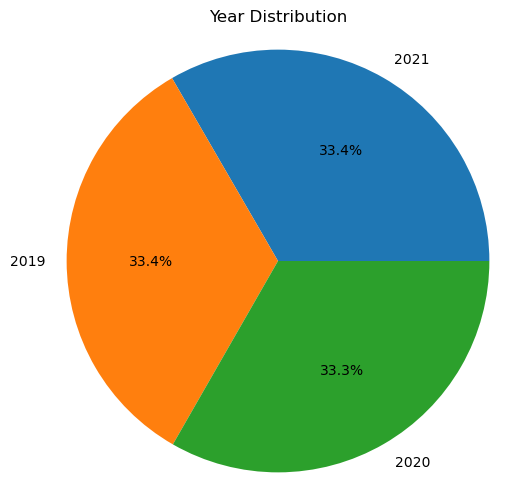

In [17]:
import matplotlib.pyplot as plt
dt = [450, 450, 449]
years = ['2021', '2019', '2020']
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(dt, labels=years, autopct='%1.1f%%')
plt.title('Year Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<font color = "Green"> We can see that year wise distribution is perfectly balanced

Conclusion : Dataset is balanced 

## STEP 3 :- Outlier Detection 

<font color = "Green">We will perform outlier detection in following coloumns<br> 
1. Number of road accidents<br>
2. Number of persons killed in road accidents<br>
3. Number of grievously injured persons<br>
4. Number of minor injured persons</font>	

### 1.) Number of road accidents

In [18]:
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021


In [19]:
column_description = data['Number of road accidents'].describe()
print(column_description)

count    1349.000000
mean      154.794663
std       297.889062
min         0.000000
25%         9.000000
50%        43.000000
75%       162.000000
max      2895.000000
Name: Number of road accidents, dtype: float64


In [21]:
median_value = data['Number of road accidents'].median()
median_value

43.0

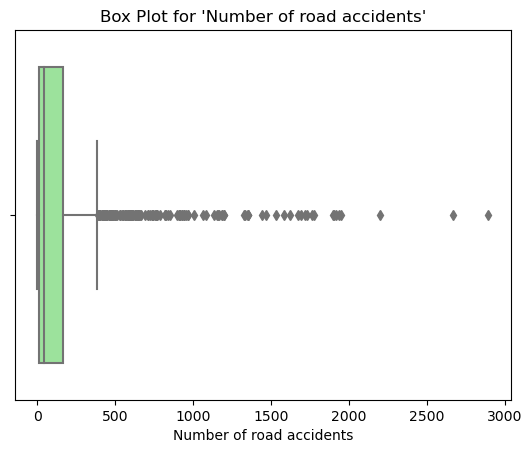

In [20]:
# Create a box plot with a custom color
sns.boxplot(data=data, x='Number of road accidents', color='lightGreen')
plt.title("Box Plot for 'Number of road accidents'")
plt.show()


<font color = "Green">We can observe outliers here

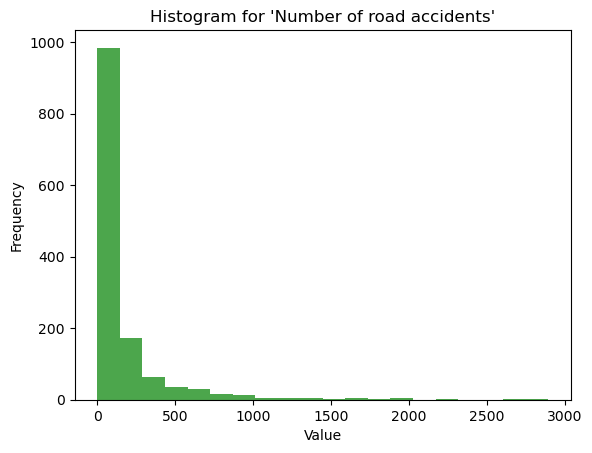

In [21]:
# Create a histogram with a custom color
plt.hist(data['Number of road accidents'], bins=20, color='green', alpha=0.7)
plt.title("Histogram for 'Number of road accidents'")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<font color = "Green">We can observe some outliers in box plot, and the feature "Number of road accident follow the Exponential distribution"</font>

In [22]:
rows_with_value_outlier = data[data['Number of road accidents'] == 2895]
rows_with_value_outlier

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
656,India,Tamil Nadu,Chennai,Two Wheelers,2895,578.0,1901.0,1105.0,2021


In [23]:
outliers_in_Number_of_road_accidents = data[data['Number of road accidents']>350]
count_of_outliers = len(outliers_in_Number_of_road_accidents)
count_of_outliers

168

<font color = "green">Here i have declared 2x of mean as outliers and we can observe significant amount of outliers in this feature , but these outiers contains important information about the objective so we cant drop outliers, here we will work with outliers, around 12 percent of data across this feature are outliers</font>

<font color = "Green"> These outliers are those zones where probability of accident is high and we need to study those zones so we have to keep outliers </font>

### 2.) Number of persons killed in road accidents

In [24]:
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021


In [25]:
column_description = data['Number of persons killed in road accidents '].describe()
print(column_description)

count    1349.000000
mean       34.610823
std        62.604220
min         0.000000
25%         2.000000
50%        10.000000
75%        42.000000
max       578.000000
Name: Number of persons killed in road accidents , dtype: float64


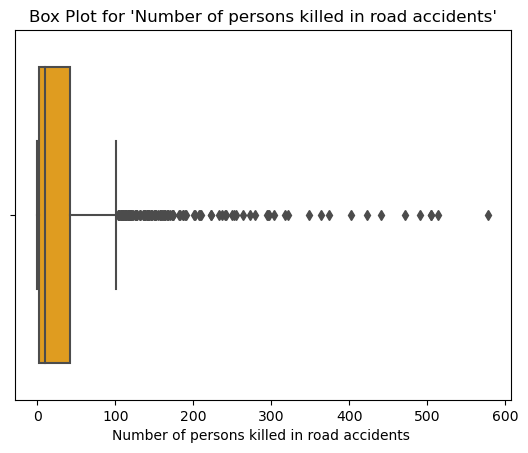

In [26]:
# Create a box plot with a custom color
sns.boxplot(data=data, x='Number of persons killed in road accidents ', color='orange')
plt.title("Box Plot for 'Number of persons killed in road accidents'")
plt.show()

<font color = "Orange">We can obsereve some outliers here also, but again it contians important information for us

In [27]:
rows_with_value_outlier = data[data['Number of persons killed in road accidents '] == 578]
rows_with_value_outlier

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
656,India,Tamil Nadu,Chennai,Two Wheelers,2895,578.0,1901.0,1105.0,2021


<font color = "Red">This is same row which had maximum number of road accident and city is "chennai"</font>

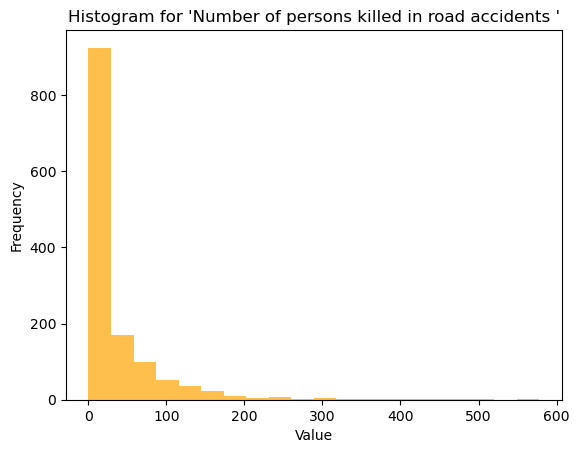

In [28]:
# Create a histogram with a custom color
plt.hist(data['Number of persons killed in road accidents '], bins=20, color='orange', alpha=0.7)
plt.title("Histogram for 'Number of persons killed in road accidents '")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<font color = "orange">Here in this feature we have exponential ditribution</font>

In [29]:
outliers_in_Number_of_persons_killed_road_accidents = data[data['Number of persons killed in road accidents ']>70]
count_of_outliers = len(outliers_in_Number_of_persons_killed_road_accidents)
count_of_outliers

205

<font color = "Green">Here we have 15 percent outlier and we have to  keep them</font>

### 3.) Number of grievously injured persons

In [30]:
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021


In [31]:
column_description = data['Number of grievously injured persons'].describe()
print(column_description)

count    1349.000000
mean       58.642698
std       146.873282
min         0.000000
25%         1.000000
50%        11.000000
75%        44.000000
max      1901.000000
Name: Number of grievously injured persons, dtype: float64


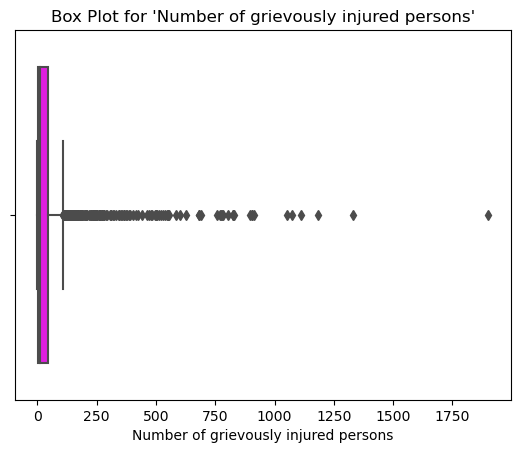

In [32]:
# Create a box plot with a custom color
sns.boxplot(data=data, x='Number of grievously injured persons', color='magenta')
plt.title("Box Plot for 'Number of grievously injured persons'")
plt.show()

<font color = "magenta">We can obsereve some outliers here also, but again it contians important information for us

In [33]:
rows_with_value_outlier = data[data['Number of grievously injured persons'] == 1901]
rows_with_value_outlier

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
656,India,Tamil Nadu,Chennai,Two Wheelers,2895,578.0,1901.0,1105.0,2021


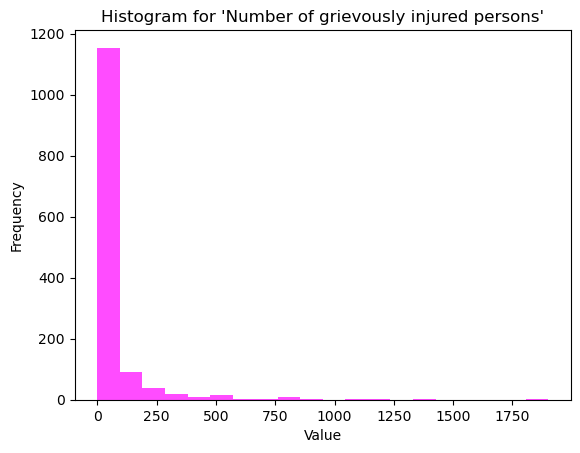

In [34]:
# Create a histogram with a custom color
plt.hist(data['Number of grievously injured persons'], bins=20, color='magenta', alpha=0.7)
plt.title("Histogram for 'Number of grievously injured persons'")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<font color = "magenta">Here in this feature we have exponential ditribution</font>

In [35]:
outliers_in_Number_Number_of_grievously_injured_persons = data[data['Number of grievously injured persons']>120]
count_of_outliers = len(outliers_in_Number_Number_of_grievously_injured_persons)
count_of_outliers

157

<font color = "Green">Here we have 12 percent outlier and we have to  keep them</font>

### 4.) Number of minor injured persons

In [36]:
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020
...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021


In [37]:
column_description = data['Number of minor injured persons'].describe()
print(column_description)

count    1349.000000
mean       77.304670
std       198.752227
min         0.000000
25%         2.000000
50%        14.000000
75%        57.000000
max      1948.000000
Name: Number of minor injured persons, dtype: float64


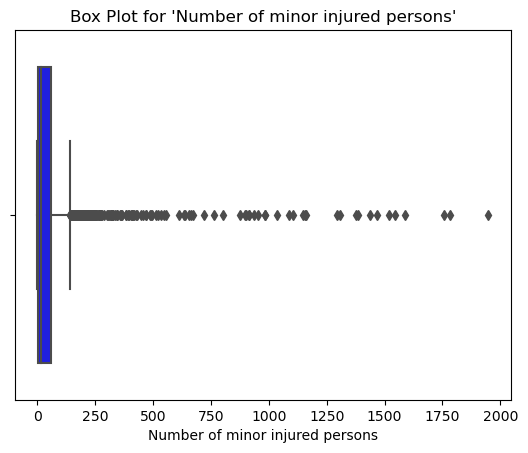

In [38]:
# Create a box plot with a custom color
sns.boxplot(data=data, x='Number of minor injured persons', color='Blue')
plt.title("Box Plot for 'Number of minor injured persons'")
plt.show()

<font color = "blue">We can obsereve some outliers here also, but again it contians important information for us

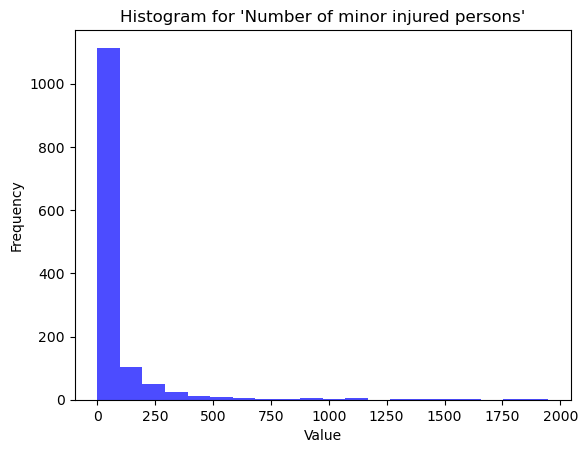

In [39]:
# Create a histogram with a custom color
plt.hist(data['Number of minor injured persons'], bins=20, color='Blue', alpha=0.7)
plt.title("Histogram for 'Number of minor injured persons'")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<font color = "blue">Here in this feature we have exponential ditribution</font>

<font color = "Green">
Conclusion after STEP 3 : <br>
-->We have outliers in all numerical feature in range 10-20 percent<br> 
-->All the numerical feature has exponential distribution<br>
-->Outliers contains important feature so we will keep all points</font> 

## STEP 4 :- Label Encoding for feature "State" and "City"

In [40]:
unique_value_counts = data.nunique()
# Display the number of unique values in each column
print(unique_value_counts)

Country                                          1
State                                           19
City name                                       50
Type of impacting vehicles or objects            9
Number of road accidents                       401
Number of persons killed in road accidents     192
Number of grievously injured persons           244
Number of minor injured persons                271
Year_int                                         3
dtype: int64


### 1. Label encoding : States

In [41]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'State' column
data['State_encoded'] = label_encoder.fit_transform(data['State'])
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021,8
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020,0
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020,5
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021,0
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020,1
...,...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021,14
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021,14
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019,14
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021,17


In [42]:
print("\nLabel Mapping:")
for label, state in enumerate(label_encoder.classes_):
    print(f"Label {label} corresponds to State: {state}")


Label Mapping:
Label 0 corresponds to State: Andhra Pradesh
Label 1 corresponds to State: Bihar
Label 2 corresponds to State: Chandigarh
Label 3 corresponds to State: Chhattisgarh
Label 4 corresponds to State: Delhi
Label 5 corresponds to State: Gujarat
Label 6 corresponds to State: Haryana
Label 7 corresponds to State: Jammu And Kashmir
Label 8 corresponds to State: Jharkhand
Label 9 corresponds to State: Karnataka
Label 10 corresponds to State: Kerala
Label 11 corresponds to State: Madhya Pradesh
Label 12 corresponds to State: Maharashtra
Label 13 corresponds to State: Punjab
Label 14 corresponds to State: Rajasthan
Label 15 corresponds to State: Tamil Nadu
Label 16 corresponds to State: Telangana
Label 17 corresponds to State: Uttar Pradesh
Label 18 corresponds to State: West Bengal


### 2. Label encoding : Cities

In [43]:
data['City_encoded'] = label_encoder.fit_transform(data['City name'])
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded,City_encoded
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021,8,12
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020,0,48
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020,5,46
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021,0,49
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020,1,37
...,...,...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021,14,19
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021,14,28
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019,14,21
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021,17,33


In [44]:
print("\nLabel Mapping:")
for label, city in enumerate(label_encoder.classes_):
    print(f"Label {label} corresponds to City: {city}")


Label Mapping:
Label 0 corresponds to City: Agra
Label 1 corresponds to City: Ahmedabad
Label 2 corresponds to City: Allahabad(Prayagraj)
Label 3 corresponds to City: Amritsar
Label 4 corresponds to City: Asansol Durgapur
Label 5 corresponds to City: Aurangabad
Label 6 corresponds to City: Bengaluru
Label 7 corresponds to City: Bhopal
Label 8 corresponds to City: Chandigarh
Label 9 corresponds to City: Chennai
Label 10 corresponds to City: Coimbatore
Label 11 corresponds to City: Delhi
Label 12 corresponds to City: Dhanbad
Label 13 corresponds to City: Faridabad
Label 14 corresponds to City: Ghaziabad
Label 15 corresponds to City: Gwalior
Label 16 corresponds to City: Hyderabad
Label 17 corresponds to City: Indore
Label 18 corresponds to City: Jabalpur
Label 19 corresponds to City: Jaipur
Label 20 corresponds to City: Jamshedpur
Label 21 corresponds to City: Jodhpur
Label 22 corresponds to City: Kannur
Label 23 corresponds to City: Kanpur
Label 24 corresponds to City: Khozikode
Label 

### 2. Label encoding : Type of impacting vehicles or objects

In [45]:
data['Vechile_impacted_encoded'] = label_encoder.fit_transform(data['Type of impacting vehicles or objects'])
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded,City_encoded,Vechile_impacted_encoded
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021,8,12,5
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020,0,48,1
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020,5,46,1
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021,0,49,0
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020,1,37,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021,14,19,4
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021,14,28,0
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019,14,21,4
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021,17,33,3


In [46]:
print("\nLabel Mapping:")
for label, veh in enumerate(label_encoder.classes_):
    print(f"Label {label} corresponds to City: {veh}")


Label Mapping:
Label 0 corresponds to City: Auto Rickshaws
Label 1 corresponds to City: Bicycles
Label 2 corresponds to City: Buses
Label 3 corresponds to City: Cars, Taxis, Vans & LMV
Label 4 corresponds to City: Other Non-motorized vehicle (E-rickshaw etc.)
Label 5 corresponds to City: Others
Label 6 corresponds to City: Pedestrian
Label 7 corresponds to City: Trucks/Lorries
Label 8 corresponds to City: Two Wheelers


<font color = "Green">
Conclusion STEP 4 : <br>
We have encoded all string type features to numerical features using label encoding<br>
States : 19 labels<br>
Cites : 50 lables<br>
Vechile impacted : 9 labels

## STEP 5 :- Data Standardization

<font color = "Green">We will be using clustering techniques like K-means , K-means++ ...  K-means is sensitive to the scale of features. It treats all features equally and can be influenced by differences in feature scales. Standardization is often recommended.

In [47]:
data

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded,City_encoded,Vechile_impacted_encoded
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,2021,8,12,5
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,2020,0,48,1
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,2020,5,46,1
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,2021,0,49,0
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,2020,1,37,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1345,India,Rajasthan,Jaipur,Other Non-motorized vehicle (E-rickshaw etc.),29,9.0,2.0,17.0,2021,14,19,4
1346,India,Rajasthan,Kota,Auto Rickshaws,7,2.0,4.0,7.0,2021,14,28,0
1347,India,Rajasthan,Jodhpur,Other Non-motorized vehicle (E-rickshaw etc.),0,0.0,0.0,0.0,2019,14,21,4
1348,India,Uttar Pradesh,Meerut,"Cars, Taxis, Vans & LMV",189,97.0,5.0,113.0,2021,17,33,3


In [48]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns for scaling
numerical_data = data.select_dtypes(include=['int', 'float'])
# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Create a new DataFrame with scaled columns
data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)
data_scaled_df = pd.DataFrame.from_dict(data_scaled)
data_scaled

,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded,City_encoded,Vechile_impacted_encoded
0,-0.519831,-0.553056,-0.399422,-0.389094,1.224291,-0.568936,-0.866505,0.387155
1,-0.392220,-0.297388,-0.344933,-0.293462,0.000000,-2.183015,1.627624,-1.161465
2,-0.456026,-0.473160,-0.331311,-0.363928,0.000000,-1.174216,1.489061,-1.161465
3,-0.271325,-0.393263,-0.086111,-0.157564,1.224291,-2.183015,1.696905,-1.548619
4,-0.251175,0.277867,0.063734,-0.373994,0.000000,-1.981255,0.865529,0.774310
...,...,...,...,...,...,...,...,...
1344,-0.422444,-0.409243,-0.385800,-0.303529,1.224291,0.641623,-0.381535,0.000000
1345,-0.496324,-0.521098,-0.372178,-0.353861,1.224291,0.641623,0.241997,-1.548619
1346,-0.519831,-0.553056,-0.399422,-0.389094,-1.224291,0.641623,-0.242973,0.000000
1347,0.114868,0.996935,-0.365367,0.179664,1.224291,1.246903,0.588404,-0.387155


In [49]:
# Create a label mapping of label-encoded values to their standardized values
state_label_to_standardized = dict(zip(data['State_encoded'], data_scaled['State_encoded']))

# Create a label mapping of label-encoded values to their original values
state_label_to_original = dict(zip(data['State_encoded'], data['State']))

# Print the standardized DataFrame and both label mappings
print("Standardized Data:")
#print(data_scaled)
print("\nLabel Mapping (Label-Encoded to Standardized):")
print(state_label_to_standardized)
print("\nLabel Mapping (Label-Encoded to Original):")
print(state_label_to_original)

Standardized Data:

Label Mapping (Label-Encoded to Standardized):
{8: -0.5689359052003111, 0: -2.1830148455057157, 5: -1.1742155078148377, 1: -1.98125497796754, 3: -1.5777352428911888, 10: -0.16541617012396, 4: -1.3759753753530133, 6: -0.9724556402766622, 9: -0.3671760376621356, 2: -1.7794951104293644, 7: -0.7706957727384867, 17: 1.2469029026432688, 13: 0.43986343249056664, 16: 1.0451430351050932, 11: 0.03634369741421554, 18: 1.4486627701814443, 14: 0.6416233000287422, 12: 0.2381035649523911, 15: 0.8433831675669178}

Label Mapping (Label-Encoded to Original):
{8: 'Jharkhand', 0: 'Andhra Pradesh', 5: 'Gujarat', 1: 'Bihar', 3: 'Chhattisgarh', 10: 'Kerala', 4: 'Delhi', 6: 'Haryana', 9: 'Karnataka', 2: 'Chandigarh', 7: 'Jammu And Kashmir', 17: 'Uttar Pradesh', 13: 'Punjab', 16: 'Telangana', 11: 'Madhya Pradesh', 18: 'West Bengal', 14: 'Rajasthan', 12: 'Maharashtra', 15: 'Tamil Nadu'}


In [50]:
nan_values = data_scaled.isna()
any_nan = nan_values.any().any()
any_nan

False

In [51]:
# Create a label mapping of label-encoded values to their standardized values
veh_label_to_standardized = dict(zip(data['Vechile_impacted_encoded'], data_scaled['Vechile_impacted_encoded']))

# Create a label mapping of label-encoded values to their original values
veh_label_to_original = dict(zip(data['Vechile_impacted_encoded'], data['Type of impacting vehicles or objects']))

# Print the standardized DataFrame and both label mappings
#print("Standardized Data:")
#print(data_scaled)
print("\nLabel Mapping (Label-Encoded to Standardized):")
print(veh_label_to_standardized)
print("\nLabel Mapping (Label-Encoded to Original):")
print(veh_label_to_original)


Label Mapping (Label-Encoded to Standardized):
{5: 0.3871548642195896, 1: -1.1614645926587688, 0: -1.5486194568783584, 6: 0.7743097284391792, 3: -0.3871548642195896, 2: -0.7743097284391792, 8: 1.5486194568783584, 4: 0.0, 7: 1.1614645926587688}

Label Mapping (Label-Encoded to Original):
{5: 'Others', 1: 'Bicycles', 0: 'Auto Rickshaws', 6: 'Pedestrian', 3: 'Cars, Taxis, Vans & LMV', 2: 'Buses', 8: 'Two Wheelers', 4: 'Other Non-motorized vehicle (E-rickshaw etc.)', 7: 'Trucks/Lorries'}


In [52]:
# Create a label mapping of label-encoded values to their standardized values
cities_label_to_standardized = dict(zip(data['City_encoded'], data_scaled['City_encoded']))

# Create a label mapping of label-encoded values to their original values
cities_label_to_original = dict(zip(data['City_encoded'], data['City name']))

# Print the standardized DataFrame and both label mappings
#print("Standardized Data:")
#print(data_scaled)
print("\nLabel Mapping (Label-Encoded to Standardized):")
print(cities_label_to_standardized)
print("\nLabel Mapping (Label-Encoded to Original):")
print(cities_label_to_original)


Label Mapping (Label-Encoded to Standardized):
{12: -0.8665048013587695, 48: 1.627623883633364, 46: 1.4890611789115789, 49: 1.6969052359942567, 37: 0.8655290076635456, 39: 1.0040917123853308, 22: -0.1736912777498435, 11: -0.9357861537196621, 25: 0.0341527793328343, 13: -0.7972234489978769, 42: 1.2119357694680086, 20: -0.3122539824716287, 43: 1.2812171218289012, 1: -1.6285996773285882, 6: -1.2821929155241252, 8: -1.14363021080234, 32: 0.5191222458590825, 41: 1.142654417107116, 27: 0.1727154840546195, 40: 1.0733730647462234, 44: 1.3504984741897936, 24: -0.035128573028058295, 29: 0.31127818877640473, 3: -1.490036972606803, 16: -0.5893793919151991, 17: -0.5200980395543066, 4: -1.4207556202459104, 15: -0.6586607442760917, 21: -0.2429726301107361, 26: 0.10343413169372691, 36: 0.796247655302653, 28: 0.24199683641551212, 18: -0.4508166871934139, 31: 0.4498408934981899, 10: -1.0050675060805547, 0: -1.6978810296894806, 35: 0.7269663029417603, 30: 0.3805595411372973, 45: 1.4197798265506862, 5: -

In [53]:
data_scaled

,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded,City_encoded,Vechile_impacted_encoded
0,-0.519831,-0.553056,-0.399422,-0.389094,1.224291,-0.568936,-0.866505,0.387155
1,-0.392220,-0.297388,-0.344933,-0.293462,0.000000,-2.183015,1.627624,-1.161465
2,-0.456026,-0.473160,-0.331311,-0.363928,0.000000,-1.174216,1.489061,-1.161465
3,-0.271325,-0.393263,-0.086111,-0.157564,1.224291,-2.183015,1.696905,-1.548619
4,-0.251175,0.277867,0.063734,-0.373994,0.000000,-1.981255,0.865529,0.774310
...,...,...,...,...,...,...,...,...
1344,-0.422444,-0.409243,-0.385800,-0.303529,1.224291,0.641623,-0.381535,0.000000
1345,-0.496324,-0.521098,-0.372178,-0.353861,1.224291,0.641623,0.241997,-1.548619
1346,-0.519831,-0.553056,-0.399422,-0.389094,-1.224291,0.641623,-0.242973,0.000000
1347,0.114868,0.996935,-0.365367,0.179664,1.224291,1.246903,0.588404,-0.387155


In [54]:
data_scaled.to_csv('pre_processed_data.csv', index=False)

Conclusion STEP 5 : Standarized data 

### Here Pre-processing of data has finished in next file we will perfrom EDA to get some insights out of data